# NIAID DATA HUB: CHARLIE (MACS/WIHS) Data Analysis

## Data Exploration using GraphQL queries (Python library)

GraphQL queries can be used as a baseline to create high-level libraries and explore the metadata in BHC. The Python library created for this data analysis can be accessed from:

https://github.com/uc-cdis/ndh-demo/blob/master/demo/ndh_analysis_functions.py

In [8]:
%matplotlib inline
#!pip install matplotlib==2.2.4
!pip install lifelines
import nde_aids_function as nde
nde.add_keys("/Users/fanwang/Downloads/BRH_notebook/niaid_credentials.json")
project_id = "HIV-CHARLIE"

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


### Get summary counts for one specific variable:

Visualize the counts we get for the HIV status variable:

In [9]:
studies = nde.get_studies(project_id)
print(studies)

[]


{}


ValueError: max() arg is an empty sequence

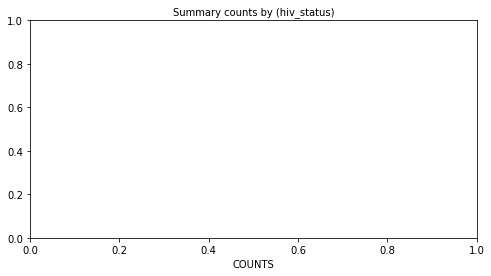

In [2]:
summary = nde.query_summary_field(project_id, "subject", "hiv_status")

## CHARLIE SCIENTIFIC USER CASES

The following part of the demo is focused on answering some specific scientific questions based on the data currently available at the **NIAID Data Hub**

### **Scientific User Case 1:** Is the number of CD4 positive cells significantly different immediately after seropositive conversion?

Compare the values for the **number of CD4 positive cells** between the last seronegative visit and the first seropositive visit. A **Wilcoxon rank-sum test** is applied to determine statistically significant differences. 

In [ ]:
values = nde.compare_lab_results(project_id, "leu3n", "# of CD4 positive cells")

### **Scientific User Case 2:** Is the viral load significantly different immediately after seropositive conversion?

Compare the values for the **viral load** between the last seronegative visit and the first seropositive visit. A **Wilcoxon rank-sum test** is applied to determine statistically significant differences.

In [ ]:
values = nde.compare_lab_results(project_id, "viral_load", "Viral load (copies/ml)")

### Scientific User Case 3: Are viral load and CD4+ cells controlled when subject are HAART treated?

Compare the values for the **viral load** and **CD4 positive cells** across the time in different visits to visualize the effect of HAART treatment. We compare values before/after first HAART treatment as well as 1, 2 and 3 years after that. A **Wilcoxon rank-sum test** is applied to determine statistically significant differences.

In [ ]:
values = nde.compare_after_haart(project_id, "viral_load", "Viral load (copies/ml)")
values = nde.compare_after_haart(project_id, "leu3n", "# of CD4 positive cells")

### Scientific User Case 4: How survival change when using HAART treatment?

Determine the **Kaplan-Meier survival curves** under the condition of **ever had HAART treatment**. Survival time is calculated as the different (in years) between first year seen seropositive and year of death (if vital status is not *Alive*).

In [ ]:
values = nde.compare_survival(project_id, "MACS", "ehaart", "Survival curves based on HAART treatment")